In [2]:
import pandas as pd

transactions_df = pd.read_csv('transactions.csv')
print(transactions_df.head())


   id  sender_id  receiver_id  amount        type                  details  \
0   1          1            2   100.0  Send Money               Rent share   
1   2          2            3    50.0  Send Money      Lunch reimbursement   
2   3          3            1    25.0  Send Money  Returned borrowed money   
3   4          4            5   200.0  Send Money            Birthday gift   
4   5          5            2    60.0  Send Money      Shared utility bill   

             timestamp  
0  2025-05-08 04:33:36  
1  2025-05-09 10:15:00  
2  2025-05-10 09:45:12  
3  2025-05-11 17:20:45  
4  2025-05-12 08:55:30  


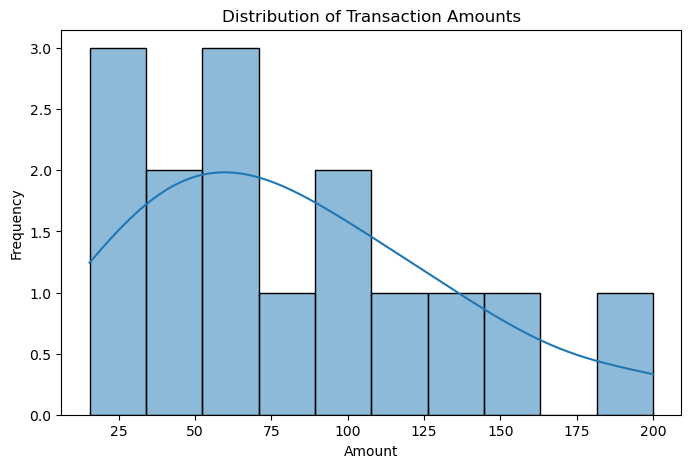

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(transactions_df['amount'], bins=10, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_784\1562877609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=transactions_df, x='type', palette='Set2')


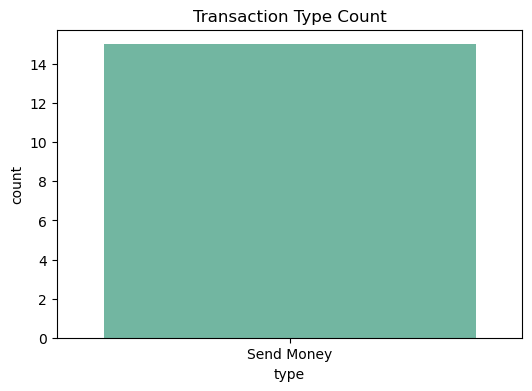

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(data=transactions_df, x='type', palette='Set2')
plt.title("Transaction Type Count")
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_1428\2611701213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=transactions_df, x='type', y='amount', palette='Set3')


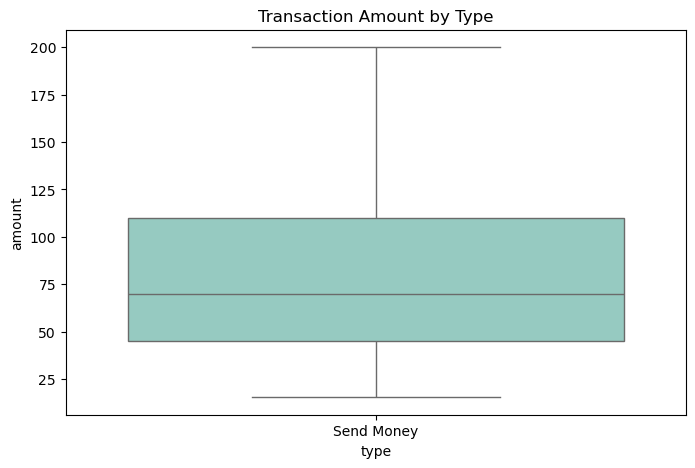

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=transactions_df, x='type', y='amount', palette='Set3')
plt.title("Transaction Amount by Type")
plt.show()


In [8]:
from sklearn.preprocessing import LabelEncoder

df = transactions_df.copy()

# Encode 'type'
le_type = LabelEncoder()
df['type'] = le_type.fit_transform(df['type'])

# Optional: drop 'details' and 'timestamp' for now
df = df.drop(['details', 'timestamp'], axis=1)


In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('amount', axis=1)  # Features: sender_id, receiver_id, type
y = df['amount']              # Target: amount

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression R²: -0.46374347723370923
MSE: 1984.1856024723613


In [14]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)

y_pred_knn = knn_reg.predict(X_test)

print("KNN Regression R²:", r2_score(y_test, y_pred_knn))
print("MSE:", mean_squared_error(y_test, y_pred_knn))


KNN Regression R²: -0.32035519125683054
MSE: 1789.8148148148148


In [16]:
X_cls = df.drop('type', axis=1)
y_cls = df['type']

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_cls = KNeighborsClassifier(n_neighbors=3)
knn_cls.fit(X_train_cls, y_train_cls)

y_pred_cls = knn_cls.predict(X_test_cls)

print("KNN Classification Accuracy:", accuracy_score(y_test_cls, y_pred_cls))


KNN Classification Accuracy: 1.0


In [18]:
pivot1 = transactions_df.pivot_table(
    index='sender_id',
    values='amount',
    aggfunc='sum'
).reset_index()

pivot1.columns = ['user_id', 'total_sent']
print(pivot1.head())


   user_id  total_sent
0        1       250.0
1        2       180.0
2        3        95.0
3        4       200.0
4        5        60.0
